### Modeling on user Level

In [135]:
# load required library
%matplotlib inline
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Importing Classifier Modules
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# cross validation
import sklearn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('../../')

os.getcwd()

'C:\\Users\\betty\\OneDrive\\Documents\\GitHub\\theme\\Google-Store-Analytics-Transactions-Revenue-Prediction'

In [3]:
# read the data
path = 'dataset/clean_data/'

# Load data
df = pd.read_pickle('customer_dataset.pkl')

In [137]:
df.head()

id  logRevenue  totals.hits_sum  totals.hits_mean  totals.pageviews_sum  totals.pageviews_mean  totals.bounces_sum  totals.bounces_mean  totals.newVisits_sum  totals.newVisits_mean  TS_adwordsClickInfo.page_max  BS_Firefox_max  BS_Chrome_max  BS_Safari_max  BS_IE_max  BS_Android_max  OS_Windows_max  OS_Macintosh_max  OS_Android_max  OS_iOS_max  subCont_NorthernAmerica_max  subCont_Western Africa_max  country_USA_max  country_Australia_max  medium_cpm_max  CG_Affiliates_max  CG_Direct_max  CG_Display_max  CG_organicSearch_max  CG_paidSearch_max  CG_Referral_max  CG_Social_max  device_Mobile_max  device_Desktop_max  cont_Africa_max  cont_Americas_max  cont_Asia_max  cont_Europe_max  cont_Oceania_max  TS_isTrueDirect_max  TS_sessionQuality.100_max  TS_Slot.RHS_max  TS_Slot.Top_max  TS_Network.Content_max  TS_Network.GSearch_max  TS_Network.PSearch_max
0  0000000259678714014         0.0               19               9.5                  13.0                    6.5                 0.0                  0.0                   1.0               0.500000                             0               0              1              0          0               0               0                 1               0           0                            1                           0                1                      0               0                  0              0               0                     1                  0                0              0                  0                   1                0                  1              0                0                 0                    1                          0                0                0                       0                       0                       0
1  0000027376579751715         0.0                6               6.0                   5.0                    5.0                 0.0                  0.0                   1.0               1.000000                             0               0              1              0          0               0               0                 1               0           0                            1                           0                1                      0               0                  0              0               0                     1                  0                0              0                  0                   1                0                  1              0                0                 0                    1                          0                0                0                       0                       0                       0
2  0000039460501403861         0.0                2               2.0                   2.0                    2.0                 0.0                  0.0                   1.0               1.000000                             0               0              1              0          0               0               1                 0               0           0                            0                           0                0                      0               0                  0              0               0                     0                  0                0              1                  0                   1                0                  1              0                0                 0                    1                          0                0                0                       0                       0                       0
3  0000040862739425590         0.0                5               2.5                   5.0                    2.5                 0.0                  0.0                   1.0               0.500000                             1               0              1              0          0               0               0                 1               0           0                            1                           0                1                      0               0                  

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716705 entries, 0 to 716704
Data columns (total 46 columns):
id                              716705 non-null object
logRevenue                      716705 non-null float64
totals.hits_sum                 716705 non-null int32
totals.hits_mean                716705 non-null float64
totals.pageviews_sum            716705 non-null float64
totals.pageviews_mean           716705 non-null float64
totals.bounces_sum              716705 non-null float64
totals.bounces_mean             716705 non-null float64
totals.newVisits_sum            716705 non-null float64
totals.newVisits_mean           716705 non-null float64
TS_adwordsClickInfo.page_max    716705 non-null int32
BS_Firefox_max                  716705 non-null int64
BS_Chrome_max                   716705 non-null int64
BS_Safari_max                   716705 non-null int64
BS_IE_max                       716705 non-null int64
BS_Android_max                  716705 non-null int64
OS_Windo

In [139]:
X = df.drop(['id','logRevenue'], axis=1).values
y = df['logRevenue'].values

# Split data into 75% train and 25% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)

In [140]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
gb = GradientBoostingRegressor()
kn = KNeighborsRegressor()
rf = RandomForestRegressor()

In [141]:
regressors = [('Linear Regression', lr),
              ('Decision Tree Regressor', dt),
              ('Gradient Boosting Regressor', gb),
              ('KNeighbors Regressor', kn),
              ('Random Forest Regressor', rf)
             ]

In [142]:
for clf_name, clf in regressors:
    clf.fit(X_train, y_train.ravel())
    predicted = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
    print('{} Train RMSE: {:.4f}'.format(clf_name, RMSE_train))
    y_pred_test = clf.predict(X_test)
    RMSE_test = (MSE(y_test, y_pred_test))**(1/2)
    print("{} Test RMSE: {:.4f}".format(clf_name, RMSE_test))

Linear Regression Train RMSE: 1.8077
Linear Regression Test RMSE: 1.7569
Decision Tree Regressor Train RMSE: 0.7377
Decision Tree Regressor Test RMSE: 2.1295
Gradient Boosting Regressor Train RMSE: 1.5847
Gradient Boosting Regressor Test RMSE: 1.5628
KNeighbors Regressor Train RMSE: 1.4677
KNeighbors Regressor Test RMSE: 1.7442
Random Forest Regressor Train RMSE: 0.9637
Random Forest Regressor Test RMSE: 1.7239


In [11]:
# cross validation
for clf_name, clf in regressors:
    MSE_CV_scores = - cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print('{} CV RMSE: {:.4f}'.format(clf_name, RMSE_CV))

Linear Regression CV RMSE: 1.8864
Decision Tree Regressor CV RMSE: 2.2538
Gradient Boosting Regressor CV RMSE: 1.5951
KNeighbors Regressor CV RMSE: 1.8651
Random Forest Regressor CV RMSE: 1.7060


### Light GBM

In [27]:
from lightgbm import LGBMRegressor

In [33]:
lgb = LGBMRegressor(random_state=0)

In [34]:
regressors = [('LightGBM', lgb)]

In [35]:
for clf_name, clf in regressors:
    clf.fit(X_train, y_train.ravel())
    predicted = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
    print('{} Train RMSE: {:.4f}'.format(clf_name, RMSE_train))
    y_pred_test = clf.predict(X_test)
    RMSE_test = (MSE(y_test, y_pred_test))**(1/2)
    print("{} Test RMSE: {:.4f}".format(clf_name, RMSE_test))

LightGBM Train RMSE: 1.4835
LightGBM Test RMSE: 1.5320


In [36]:
# cross validation
for clf_name, clf in regressors:
    MSE_CV_scores = - cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print('{} CV RMSE: {:.4f}'.format(clf_name, RMSE_CV))

LightGBM CV RMSE: 1.5735


In [37]:
# Tune Paramaters with lightgbm

# Create parameters to search
gridParams = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # default 0.1
    'n_estimators': [40, 100, 150], # default 100
    'num_leaves': [21,31,41], # default 31
    'random_state': [0], # Updated from 'seed'
    'max_depth': [-1, 20],
    }

In [39]:
lgb_grid = LGBMRegressor(boosting_type= 'gbdt',
          objective = 'regression',
          n_jobs = 3, # Updated from 'nthread'
          max_depth = 1000)

# Create the grid
grid = GridSearchCV(lgb_grid, gridParams, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=1000,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=3, num_leaves=31, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2], 'n_estimators': [40, 100, 150], 'num_leaves': [21, 31, 41], 'random_state': [0], 'max_depth': [-1, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
print('Best parameters found by grid search are:', grid.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 150, 'num_leaves': 31, 'random_state': 0}


In [41]:
y_pred_train = grid.predict(X_train)
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
print('LightGBM Tuned Train RMSE: {:.4f}'.format(RMSE_train))
y_pred_test = grid.predict(X_test)
RMSE_test = (MSE(y_test, y_pred_test))**(1/2)
print("LightGBM Tuned RMSE: {:.4f}".format(RMSE_test))

LightGBM Tuned Train RMSE: 1.4992
LightGBM Tuned RMSE: 1.5286


In [43]:
# Tuned Set cross validation
lgbm_tuned = LGBMRegressor(learning_rate= 0.05, max_depth= -1, n_estimators=150, num_leaves= 31, random_state=0)
regressors = [('LightGBM Tuned', lgbm_tuned)]
for clf_name, clf in regressors:
    MSE_CV_scores = - cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print('{} CV RMSE: {:.4f}'.format(clf_name, RMSE_CV))

LightGBM Tuned CV RMSE: 1.5705


### Ridge Regression Model

In [64]:
ridge = RidgeCV(cv=10)

# fit or train the linear regression model on the training set and store␣
ridge.fit(X_train, y_train)
# show the alpha parameter used in final ridgeCV model ridge.alpha_
ridge.alpha_

#
train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

In [65]:
#print RMSE of training predictions 
print('RMSE on train for regression: ', np.sqrt(MSE(y_train, train_pred)))
print('RMSE on test for regression: ', np.sqrt(MSE(y_test,ridge_test_pred)))

RMSE on train for regression:  1.8034646533154102
RMSE on test for regression:  1.7532182935174567


In [80]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(ridge, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {}'.format(RMSE_CV))


CV RMSE: 1.8832573754617306


### Gradient Model

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gradient = ensemble.GradientBoostingRegressor(**params)

gradient.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [114]:
# Predict the test set labels 'y_pred' 
y_pred = gradient.predict(X_test) 
y_pred_train=gradient.predict(X_train) 

# Evaluate the test set RMSE 
rmse_test = MSE(y_test, y_pred)**(1/2) 
rmse_train = MSE(y_train, y_pred_train)**(1/2) 

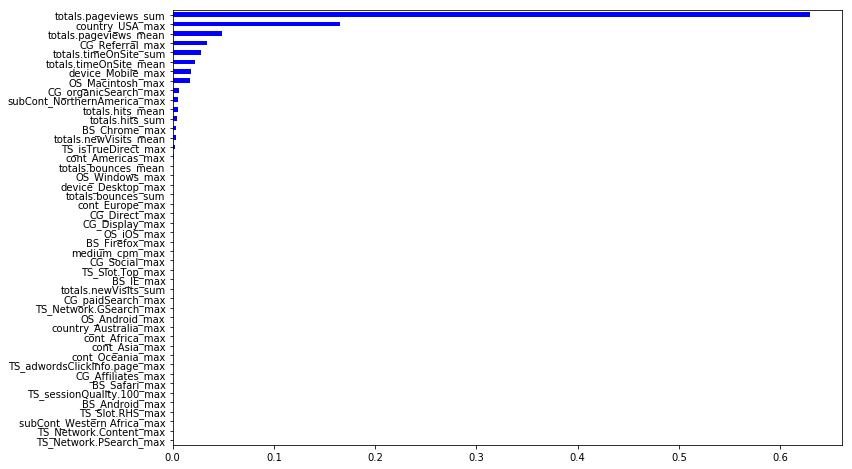

In [120]:
# Create a pd.Series of features importances
importances_grad = pd.Series(gradient.feature_importances_,
index = X_train.columns)

# Sort importances_rf
sorted_importances_grad = importances_grad.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(12, 8))  
sorted_importances_grad.plot(kind='barh', color='blue')
plt.show()

In [116]:
# Print the test set RMSE 
print('Train set RMSE for gradient on train data: {:.3f}'.format(rmse_train))
print('Test set RMSE for gradient on test data: {:.3f}'.format(rmse_test)) 

Train set RMSE for gradient on train data: 1.569
Test set RMSE for gradient on test data: 1.549


In [121]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(gradient, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {}'.format(RMSE_CV))


CV RMSE: 1.5890321737147615


### XGBoost Model

In [85]:
# xgb models only accept 'DMatrix' input; convert the data here 
dtrain = xgb.DMatrix(X_train, label=y_train) 
dtest = xgb.DMatrix(X_test, label=y_test)
# parameter grid for xgb model 
param_dict = { 'max_depth':6, 'min_child_weight': 1, 
              'eta':.1, 'subsample': 1, 
              'colsample_bytree': 1, # Other parameters 'objective':'reg:linear', 'eval_metric':'rmse'
}
# train XGB model on split training data using split test data 
num_boost_round=999 
model_xgb = xgb.train( param_dict, dtrain, 
                  num_boost_round=num_boost_round, 
                  evals=[(dtest, "Test")], 
                  early_stopping_rounds=10)

[0]	Test-rmse:1.92166
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:1.85834
[2]	Test-rmse:1.80575
[3]	Test-rmse:1.76179
[4]	Test-rmse:1.72542
[5]	Test-rmse:1.69406
[6]	Test-rmse:1.66826
[7]	Test-rmse:1.64707
[8]	Test-rmse:1.62902
[9]	Test-rmse:1.61358
[10]	Test-rmse:1.60124
[11]	Test-rmse:1.59105
[12]	Test-rmse:1.58294
[13]	Test-rmse:1.57588
[14]	Test-rmse:1.56972
[15]	Test-rmse:1.56492
[16]	Test-rmse:1.56075
[17]	Test-rmse:1.55755
[18]	Test-rmse:1.55472
[19]	Test-rmse:1.55265
[20]	Test-rmse:1.55028
[21]	Test-rmse:1.54817
[22]	Test-rmse:1.54683
[23]	Test-rmse:1.54537
[24]	Test-rmse:1.54411
[25]	Test-rmse:1.54286
[26]	Test-rmse:1.54213
[27]	Test-rmse:1.54121
[28]	Test-rmse:1.54032
[29]	Test-rmse:1.53972
[30]	Test-rmse:1.53915
[31]	Test-rmse:1.53881
[32]	Test-rmse:1.53816
[33]	Test-rmse:1.53786
[34]	Test-rmse:1.53794
[35]	Test-rmse:1.53766
[36]	Test-rmse:1.53742
[37]	Test-rmse:1.53693
[38]	Test-rmse:1.53698
[39]	Test-rmse:1.53666
[40]	Test-rmse:1.53636
[41]	Test-

In [92]:
dpred=xgb.DMatrix(X_train)

# predict RMSE of model on training data 
print("RMSE of XGB model on train data: ", np.sqrt(MSE(model_xgb.predict(dpred), y_train)))
# predict RMSE of model on test data 
model_xgb_test_pred = model_xgb.predict(xgb.DMatrix(X_test)) 
print("RMSE of XGB model on test data: ", np.sqrt(MSE(model_xgb_test_pred, y_test)))

RMSE of XGB model on train data:  1.495640233002153
RMSE of XGB model on test data:  1.534322659461396


<Figure size 1440x1440 with 0 Axes>

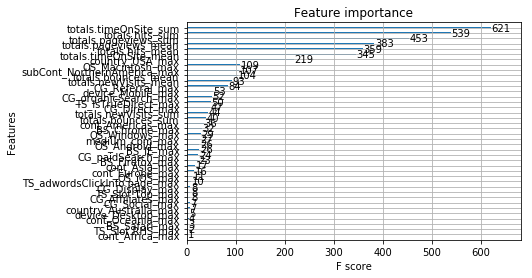

In [88]:
plt.figure(figsize=(20, 20))  
plt.show(plot_importance(model_xgb))